In [1]:
# Data information:
# https://archive.ics.uci.edu/ml/datasets/Heart+Disease

# Data source
# https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

In [24]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
import seaborn as sns

### Import and process the data

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
data = pd.read_csv(url, sep = ',', header=None)
data.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','DISEASE']

data = data.replace('?',np.nan).dropna()

In [6]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,DISEASE
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,DISEASE
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [8]:
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop(['sex','fbs','exang','DISEASE'])
cols2zscore

Index(['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')

In [9]:
for c in cols2zscore:
    d = pd.to_numeric(data[c]) # force to numeric (addresses some data-format issues)
    data[c] = (d - d.mean())/d.std(ddof=1)

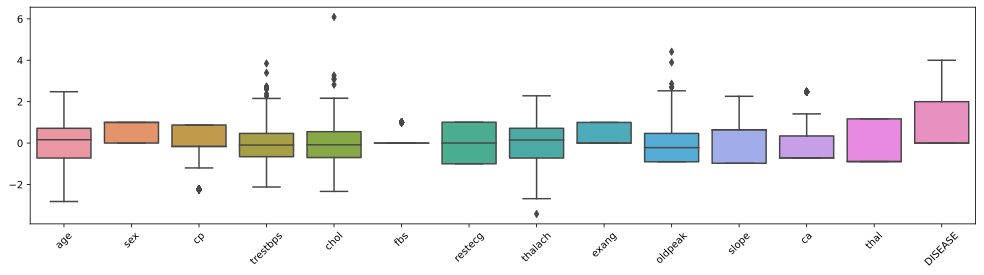

In [10]:
# check the distributions again
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [ ]:
# Count all uniwue value types for "DISEASE"
data['DISEASE'].value_counts()

In [12]:
data['DISEASE'][data['DISEASE']>0] =1

<ipython-input-12-c0f505294714>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DISEASE'][data['DISEASE']>0] =1


In [14]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,DISEASE
0,0.934603,1.0,-2.236854,0.749116,-0.275978,1.0,1.008496,0.017465,0.0,1.067164,2.260330,-0.720760,0.654772,0
1,1.376605,1.0,0.872408,1.593577,0.743301,0.0,1.008496,-1.813274,1.0,0.381130,0.642696,2.474249,-0.892713,1
2,1.376605,1.0,0.872408,-0.658320,-0.352904,0.0,1.008496,-0.897904,1.0,1.324427,0.642696,1.409246,1.170601,1
3,-1.938409,1.0,-0.164013,-0.095345,0.050961,0.0,-1.001728,1.630258,0.0,2.096215,2.260330,-0.720760,-0.892713,0
4,-1.496407,0.0,-1.200433,-0.095345,-0.833696,0.0,1.008496,0.976423,0.0,0.295376,-0.974938,-0.720760,-0.892713,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.271600,0.0,0.872408,0.467629,-0.122124,0.0,-1.001728,-1.159438,1.0,-0.733675,0.642696,-0.720760,1.170601,1
298,-1.054405,1.0,-2.236854,-1.221294,0.320204,0.0,-1.001728,-0.767137,0.0,0.123867,0.642696,-0.720760,1.170601,1
299,1.487106,1.0,0.872408,0.692818,-1.045244,1.0,-1.001728,-0.374836,0.0,2.010461,0.642696,1.409246,1.170601,1
300,0.271600,1.0,0.872408,-0.095345,-2.237607,0.0,-1.001728,-1.508150,1.0,0.123867,0.642696,0.344243,1.170601,1


### Re-organazing data: train/test Loaders

In [16]:
data_training = torch.tensor(data[data.keys().drop('DISEASE')].values).float()
labels = torch.tensor( data['DISEASE'].values).float()

print(data.shape)
print(labels.shape)

(297, 14)
torch.Size([297])


In [17]:
labels = labels[:,None]   # converting to multidimiensional tensor

In [22]:
#Use scikit learn to split among train test
X_train, X_test, y_train, y_test = train_test_split(data_training, labels, test_size=50, random_state=42)

#convert into pytorch dataset
train_data = TensorDataset(X_train,y_train)
test_data = TensorDataset(X_test,y_test)

# Translate to dataloader object
train_loader = DataLoader(train_data, batch_size=20,drop_last=True, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [23]:
#Check sizes of data batches
for X,y in train_loader:
    print(X.shape,y.shape)

torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])


### Create a class for the DL model

In [25]:
#creating class for the network architecture
class ffn_clf(nn.Module):
    def __init__(self):
        super().__init__()

        ## input layer
        self.input = nn.Linear(13,32)

        ## hidden layer
        self.hidden_1 = nn.Linear(32,32)
        self.hidden_2 = nn.Linear(32,10)

        ## Output layer
        self.output = nn.Linear(10,1)

    #forward pass
    def forward(self,x):
        x = F.relu( self.input(x) )
        x = F.relu( self.hidden_1(x) )
        x = F.relu( self.hidden_2(x) )
        return self.output(x)


In [27]:
# test the sanity
net = ffn_clf()

X,y = next(iter(test_loader))
y_hat = net(X)
print(y_hat)

#test the loss functin

loss_fun = nn.BCEWithLogitsLoss()
loss_fun(y_hat,y)

tensor([[-0.3106],
        [-0.2951],
        [-0.3212],
        [-0.2833],
        [-0.3106],
        [-0.3224],
        [-0.3135],
        [-0.2980],
        [-0.3007],
        [-0.3143],
        [-0.3212],
        [-0.3069],
        [-0.3121],
        [-0.3010],
        [-0.3474],
        [-0.3053],
        [-0.3039],
        [-0.3187],
        [-0.3185],
        [-0.2794],
        [-0.3035],
        [-0.2988],
        [-0.2998],
        [-0.3056],
        [-0.3128],
        [-0.3026],
        [-0.3021],
        [-0.3029],
        [-0.3101],
        [-0.3150],
        [-0.2921],
        [-0.2921],
        [-0.2861],
        [-0.3176],
        [-0.2692],
        [-0.3203],
        [-0.3146],
        [-0.3079],
        [-0.3126],
        [-0.2761],
        [-0.3291],
        [-0.2986],
        [-0.2929],
        [-0.2931],
        [-0.3097],
        [-0.3140],
        [-0.3213],
        [-0.3260],
        [-0.3123],
        [-0.3073]], grad_fn=<AddmmBackward0>)


tensor(0.6668, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

### Train model and perfomace observing

In [35]:
# start with a fresh network
net = ffn_clf()
optimizer = torch.optim.Adam(net.parameters(),lr=.0001)
lossfun = nn.BCEWithLogitsLoss() # try with different loss function


# number of training epochs
numepochs = 100


# initialize losses and accuracies
trainLoss = torch.zeros(numepochs)
testLoss  = torch.zeros(numepochs)
trainAcc  = torch.zeros(numepochs)
testAcc   = torch.zeros(numepochs)


# loop over epochs
for epochi in range(numepochs):

    # loop over training data batches
    batchLoss = []
    for X,y in train_loader:

        # forward pass and loss
        yHat = net(X)
        loss = lossfun(yHat,y)

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # loss from this batch
        batchLoss.append(loss.item())

        # train accuracy
        predictions = (torch.sigmoid(yHat)>.5).float()
        trainAcc[epochi] = 100*torch.mean((predictions==y).float())

    # end of batch loop...

    # get average losses across the batches
    trainLoss[epochi] = np.mean(batchLoss)


    ## now for the test
    X,y = next(iter(test_loader))
    yHat = net(X)

    # test loss
    loss = lossfun(yHat,y)
    testLoss[epochi] = loss.item()

    # test accuracy
    predictions = (torch.sigmoid(yHat)>.5).float()
    testAcc[epochi] = 100*torch.mean((predictions==y).float())

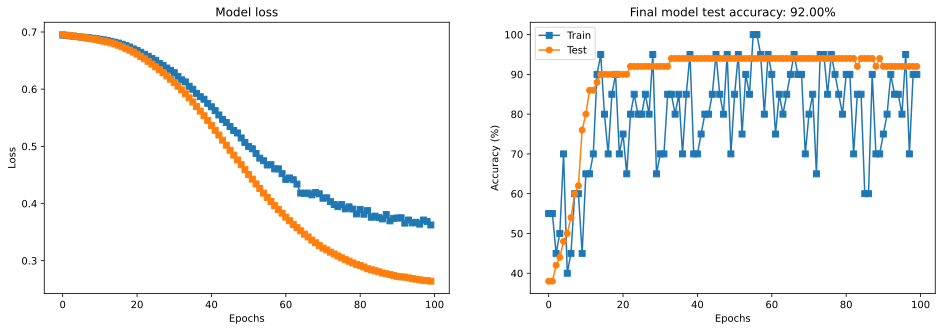

In [36]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(trainLoss,'s-',label='Train')
ax[0].plot(testLoss,'s-',label='Test')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,'s-',label='Train')
ax[1].plot(testAcc,'o-',label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

### Thank you